In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_fasting = pd.read_csv('fasting_features_calc_mov_avg_30_als.csv')
df_food = pd.read_csv('food_features_calc_mov_avg_30_als.csv')
ppg_features = pd.concat([df_fasting, df_food])
cols_to_drop = ['Наличие диабета', 'Уровень глюкозы, ммоль/л', 'Возраст, лет', 'Вес, кг', 'Рост, см', 'Пол']
ppg_features.drop(labels=cols_to_drop, axis='columns', inplace=True)
gkb = pd.read_excel('ГКБ.xlsx')
gkb['Площадка'] = 'ГКБ'
mknc = pd.read_excel('МКНЦ.xlsx')
mknc['Площадка'] = 'МКНЦ'
poly = pd.read_excel('Поликлиника.xlsx')
poly['Площадка'] = 'Поликлиника'
annotation_features = pd.concat([gkb, mknc, poly])
df_summary = pd.merge(ppg_features, annotation_features.rename(columns={'Номер ЭКГ/ФПГ': 'cid'}), on='cid').dropna(subset='Уровень глюкозы, ммоль/л')

In [5]:
df_summary.to_csv('all_ppg_features.csv', index=False)

План:
* Работа в контексте проекта
    * Оставить только фичи, что мы рассчитали и фичи с полом, возрастом, ростом, весом, уровнем глюкозы убрав Null
    * Построить гистограммы с полом, возрастом, ростом, весом, уровнем глюкозы
    * Отобразить топ 5 корреляций
    * Убрать аннотационные фичи и раскидать по файлам
* Работа в контексте ВКР
    * Убрать null
    * Сформировать тестовую выборку
    * Построить гистограммы с полом, возрастом, ростом, весом, уровнем глюкозы, распределением по классам для тестовой и обучающей выборок

In [85]:
df = pd.read_csv('unprocessed_dataset_features_calc_mov_avg_30_als_.csv')

In [47]:
df_summary = pd.concat([df.iloc[:, 3:8], df.iloc[:, -50:]], axis=1).dropna()

In [48]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2918
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Уровень глюкозы, ммоль/л  2747 non-null   float64
 1   Возраст, лет              2747 non-null   int64  
 2   Вес, кг                   2747 non-null   int64  
 3   Рост, см                  2747 non-null   int64  
 4   Пол                       2747 non-null   int64  
 5   AR_PPG_1                  2747 non-null   float64
 6   AR_PPG_2                  2747 non-null   float64
 7   AR_PPG_3                  2747 non-null   float64
 8   AR_PPG_4                  2747 non-null   float64
 9   AR_PPG_5                  2747 non-null   float64
 10  AR_KTE_1                  2747 non-null   float64
 11  AR_KTE_2                  2747 non-null   float64
 12  AR_KTE_3                  2747 non-null   float64
 13  AR_KTE_4                  2747 non-null   float64
 14  AR_KTE_5

In [49]:
dict(df_summary.corr()['Уровень глюкозы, ммоль/л'])

{'Уровень глюкозы, ммоль/л': 1.0,
 'Возраст, лет': 0.43401643635857035,
 'Вес, кг': 0.27273852001319976,
 'Рост, см': 0.00595074736729701,
 'Пол': -0.15656867595763926,
 'AR_PPG_1': -0.000966096116708598,
 'AR_PPG_2': 0.0010758061423749557,
 'AR_PPG_3': 0.0016675473415103481,
 'AR_PPG_4': 9.275782830191957e-05,
 'AR_PPG_5': -0.000921072660721453,
 'AR_KTE_1': -0.0018638713963336077,
 'AR_KTE_2': 0.0004193700039756892,
 'AR_KTE_3': -0.0029438640714071177,
 'AR_KTE_4': 0.005075201787918086,
 'AR_KTE_5': -0.005959714384306242,
 'KTE_mean': -0.035514801087471445,
 'KTE_std': -0.03340735908641913,
 'KTE_skew': -0.043095598292957865,
 'KTE_iqr': 0.029239408481539247,
 'entropy_mean': 0.03072174299331632,
 'entropy_std': 0.10793731483996681,
 'entropy_skew': -0.08560434462355614,
 'entropy_iqr': -0.008666252313493168,
 'AR_spectral_energy_1': -0.03313484799322498,
 'AR_spectral_energy_2': 0.03032784130996679,
 'AR_spectral_energy_3': -0.026702852613631874,
 'AR_spectral_energy_4': 0.026633632

array([[<AxesSubplot:title={'center':'Уровень глюкозы, ммоль/л'}>,
        <AxesSubplot:title={'center':'Возраст, лет'}>],
       [<AxesSubplot:title={'center':'Вес, кг'}>,
        <AxesSubplot:title={'center':'Рост, см'}>],
       [<AxesSubplot:title={'center':'Пол'}>, <AxesSubplot:>]],
      dtype=object)

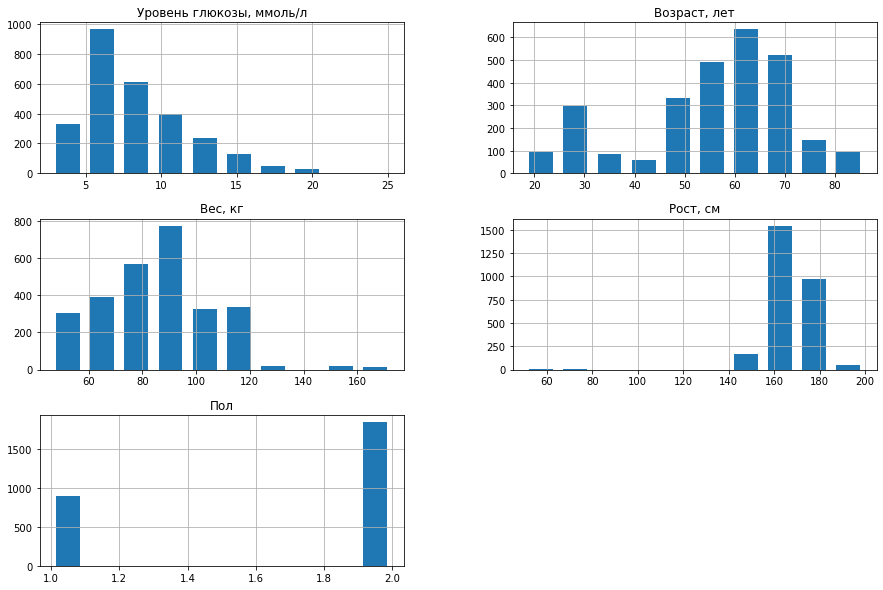

In [57]:
df_summary.iloc[:, :5].hist(figsize=(15, 10), rwidth=0.7)

In [72]:
corr_cols = df_summary.columns[5:][(abs(df_summary.drop(df_summary.columns[[1,2,3,4]], axis='columns').corr()['Уровень глюкозы, ммоль/л']) > 0.1)[1:]]

C:\Users\smaslikhov\AppData\Local\Temp\ipykernel_8940\3329864039.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


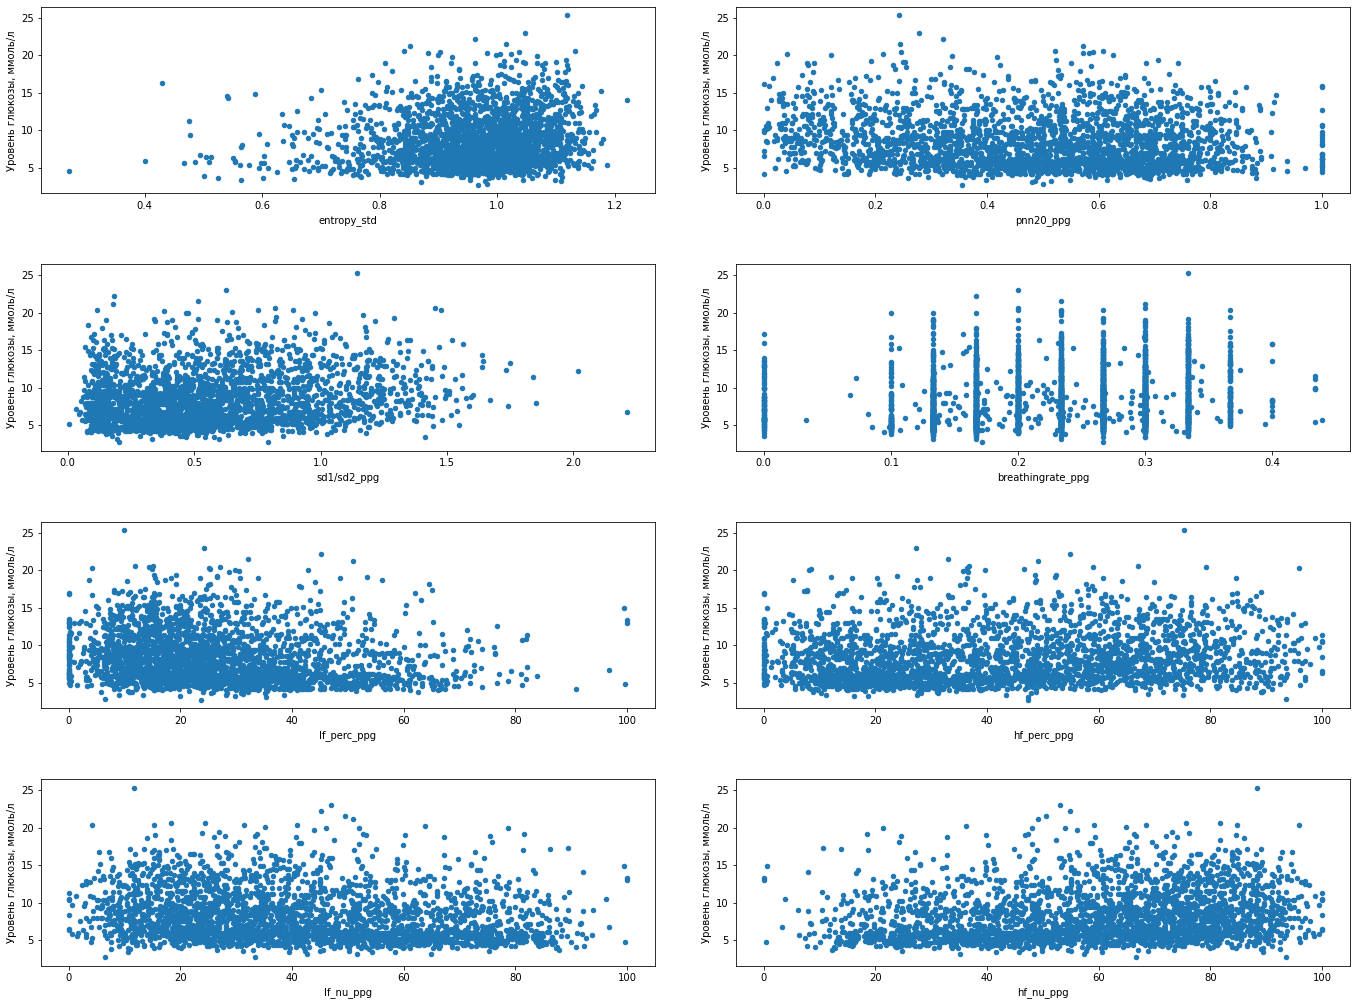

In [80]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))
fig.tight_layout(pad=5.0)
for i, feature in enumerate(corr_cols):
    df_summary.plot(x=feature, y='Уровень глюкозы, ммоль/л', ax=ax[i//2, i%2], kind='scatter')
fig.show()

# for i, column in corr_cols:
#     ax1 = fig.add_subplot(2, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax1.plot(df_fasting['ppg_data'][0][500:550], label='Raw')
# ax2.plot(res[500:550], color='r', label='MA+ALS')
# ax1.legend()
# ax2.legend()

*План работ*
* Проверить разбиение по: диабетикам (0 и 1,2), натощак\ненатощак, по площадкам, по возрасту (до 44, 45-64, 64+), полу

In [83]:
df_summary = df_summary.drop(df_summary.columns[[1,2,3,4]], axis='columns')

In [84]:
diabetes = (df_summary['Наличие диабета'] == 1) | (df_summary['Наличие диабета'] == 2)
nodiabetes = df_summary['Наличие диабета'] == 0
fasting = df_summary['Натощак'] == 1
food = df_summary['Натощак'] == 0
gkb = df_summary['Площадка'] == 'ГКБ'
mknc = df_summary['Площадка'] == 'МКНЦ'
poly = df_summary['Площадка'] == 'Поликлиника'
less_44 = df_summary['Возраст, лет'] <= 44
from_45_to_64 = (df_summary['Возраст, лет'] > 44) & (df_summary['Возраст, лет'] <= 64)
more_64 = df_summary['Возраст, лет'] > 64
men = df_summary['Пол'] == 1
women = df_summary['Пол'] == 2

KeyError: 'Наличие диабета'

In [24]:
df_summary[nodiabetes].to_csv('datasets/nodiabetes.csv')
df_summary[diabetes].to_csv('datasets/diabetes.csv')
df_summary[fasting].to_csv('datasets/fasting.csv')
df_summary[food].to_csv('datasets/food.csv')
df_summary[gkb].to_csv('datasets/gkb.csv')
df_summary[mknc].to_csv('datasets/mknc.csv')
df_summary[poly].to_csv('datasets/poly.csv')
df_summary[less_44].to_csv('datasets/less_44.csv')
df_summary[from_45_to_64].to_csv('datasets/from_45_to_64.csv')
df_summary[more_64].to_csv('datasets/more_64.csv')
df_summary[men].to_csv('datasets/men.csv')
df_summary[women].to_csv('datasets/women.csv')